In [ ]:
import pandas as pd
import json

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Carica il file JSON in un oggetto python
with open('data/difficulty.json', 'r') as file:
    data = json.load(file)

# Normalizza i dati del file JSON
df = pd.json_normalize(data, 'difficulty', ['metric1', 'metric2'])



In [30]:
# Crea una lista di date partendo dal 23 dicembre 2021 fino al 22 dicembre 2022
dates = pd.date_range(start='2021-12-23', end='2022-12-21', freq='D')

# Crea una nuova colonna "date" nel tuo dataframe e assegna ad ogni riga una data
df['date'] = dates

In [31]:
df.shape

(364, 5)

In [35]:
# Converte la colonna "date" in una colonna di stringhe nel formato yyyy-mm-dd
#df['date'] = df['date'].dt.strftime('%Y-%m-%d')

df = df.drop(['x', 'metric1', 'metric2'], axis=1)
df.tail()

,y,date
359,3.424433e+13,2022-12-17
360,3.424433e+13,2022-12-18
361,3.460660e+13,2022-12-19
362,3.536407e+13,2022-12-20
363,3.536407e+13,2022-12-21


In [36]:
df.rename(columns={'date': 'time'}, inplace=True)
df.head()

,y,time
0,2.419529e+13,2021-12-23
1,2.419529e+13,2021-12-24
2,2.424246e+13,2021-12-25
3,2.427233e+13,2021-12-26
4,2.427233e+13,2021-12-27


In [37]:
#trasforma df['time'] in datetime
df['time'] = pd.to_datetime(df['time'])

In [38]:
df = df.set_index('time')
df.head()

,y
time,
2021-12-23,2.419529e+13
2021-12-24,2.419529e+13
2021-12-25,2.424246e+13
2021-12-26,2.427233e+13
2021-12-27,2.427233e+13


In [39]:
df = df.loc['2022-06-11':'2022-12-11']

In [40]:
df.shape

(184, 1)

In [41]:
#imposto time come indice

df = df.reset_index()
df.head()

,time,y
0,2022-06-11,3.028329e+13
1,2022-06-12,3.028329e+13
2,2022-06-13,3.028329e+13
3,2022-06-14,3.028329e+13
4,2022-06-15,3.028329e+13


In [42]:
df2 = pd.read_csv('data/bitcoin.csv')
print(df2.shape)
df2.head()

(194, 9)


,time,low,high,open,close,volume,greed_and_fear,google_trend,sentiment_medio
0,2022-12-11,17073.19,17271.92,17128.10,17085.21,9948.852670,26,30,0.057855
1,2022-12-10,17093.42,17227.64,17130.49,17128.10,7860.586876,27,28,0.023664
2,2022-12-09,17060.69,17352.62,17226.03,17130.59,20976.636999,26,28,0.079547
3,2022-12-08,16738.00,17300.59,16839.76,17226.01,23533.234537,25,28,0.098894
4,2022-12-07,16679.52,17140.22,17089.18,16840.00,22635.468488,29,28,0.098525


In [43]:
#trasforma df['time'] in datetime
df2['time'] = pd.to_datetime(df2['time'])

In [44]:
df.shape

(184, 2)

In [45]:
df_merged = pd.merge(df2, df, on='time')

In [46]:
df_merged = df_merged.set_index('time')
df_merged.head()

,low,high,open,close,volume,greed_and_fear,google_trend,sentiment_medio,y
time,,,,,,,,,
2022-12-11,17073.19,17271.92,17128.10,17085.21,9948.852670,26,30,0.057855,3.424433e+13
2022-12-10,17093.42,17227.64,17130.49,17128.10,7860.586876,27,28,0.023664,3.424433e+13
2022-12-09,17060.69,17352.62,17226.03,17130.59,20976.636999,26,28,0.079547,3.424433e+13
2022-12-08,16738.00,17300.59,16839.76,17226.01,23533.234537,25,28,0.098894,3.424433e+13
2022-12-07,16679.52,17140.22,17089.18,16840.00,22635.468488,29,28,0.098525,3.424433e+13


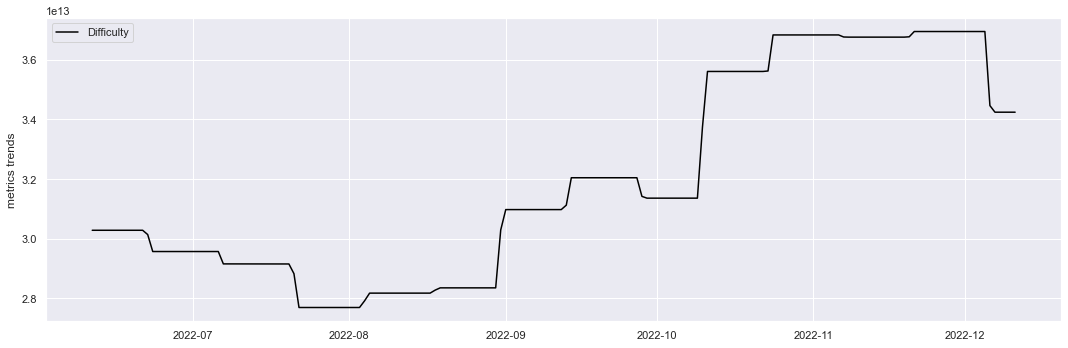

In [49]:
sns.set()

plt.figure(figsize=(15,5))
plt.plot(df_merged['y'],
         label='Difficulty',
         color='black')

plt.ylabel('metrics trends')
plt.legend();
plt.tight_layout();

In [51]:
df = df_merged.rename(columns={'y': 'difficulty'})
df.head()

,low,high,open,close,volume,greed_and_fear,google_trend,sentiment_medio,difficulty
time,,,,,,,,,
2022-12-11,17073.19,17271.92,17128.10,17085.21,9948.852670,26,30,0.057855,3.424433e+13
2022-12-10,17093.42,17227.64,17130.49,17128.10,7860.586876,27,28,0.023664,3.424433e+13
2022-12-09,17060.69,17352.62,17226.03,17130.59,20976.636999,26,28,0.079547,3.424433e+13
2022-12-08,16738.00,17300.59,16839.76,17226.01,23533.234537,25,28,0.098894,3.424433e+13
2022-12-07,16679.52,17140.22,17089.18,16840.00,22635.468488,29,28,0.098525,3.424433e+13


In [53]:
df.to_csv('data/bitcoin.csv')